# Heart Failure Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Load dataset
df=pd.read_csv("documents/ITCS3162/heart 2.csv")

## Pre-processing

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Rows and columns
df.shape

(918, 12)

In [6]:
# Check for nulls
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Understanding & Visualization

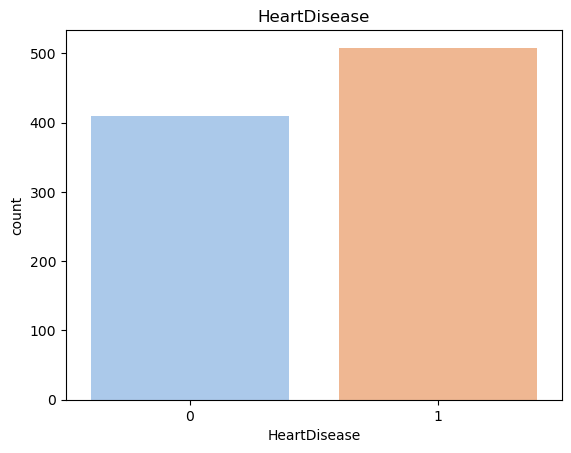

In [9]:
sns.countplot(x=df['HeartDisease'], palette='pastel')
plt.title('HeartDisease');

In [10]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

df.hist(figsize=(12,10), color='pink')
plt.show()

/var/folders/_4/kjtwnd2j2sl3mvy6q1g5h7z40000gn/T/ipykernel_63008/1122789038.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel', kde=True)
/var/folders/_4/kjtwnd2j2sl3mvy6q1g5h7z40000gn/T/ipykernel_63008/1122789038.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel', kde=True)
/var/folders/_4/kjtwnd2j2sl3mvy6q1g5h7z40000gn/T/ipykernel_63008/1122789038.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel', kde=True)
/var/folders/_4/kjtwnd2j2sl3mvy6q1g5h7z40000gn/T/ipykernel_63008/1122789038.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel', kde=True)
/var/folders/_4/kjtwnd2j2sl3mvy6

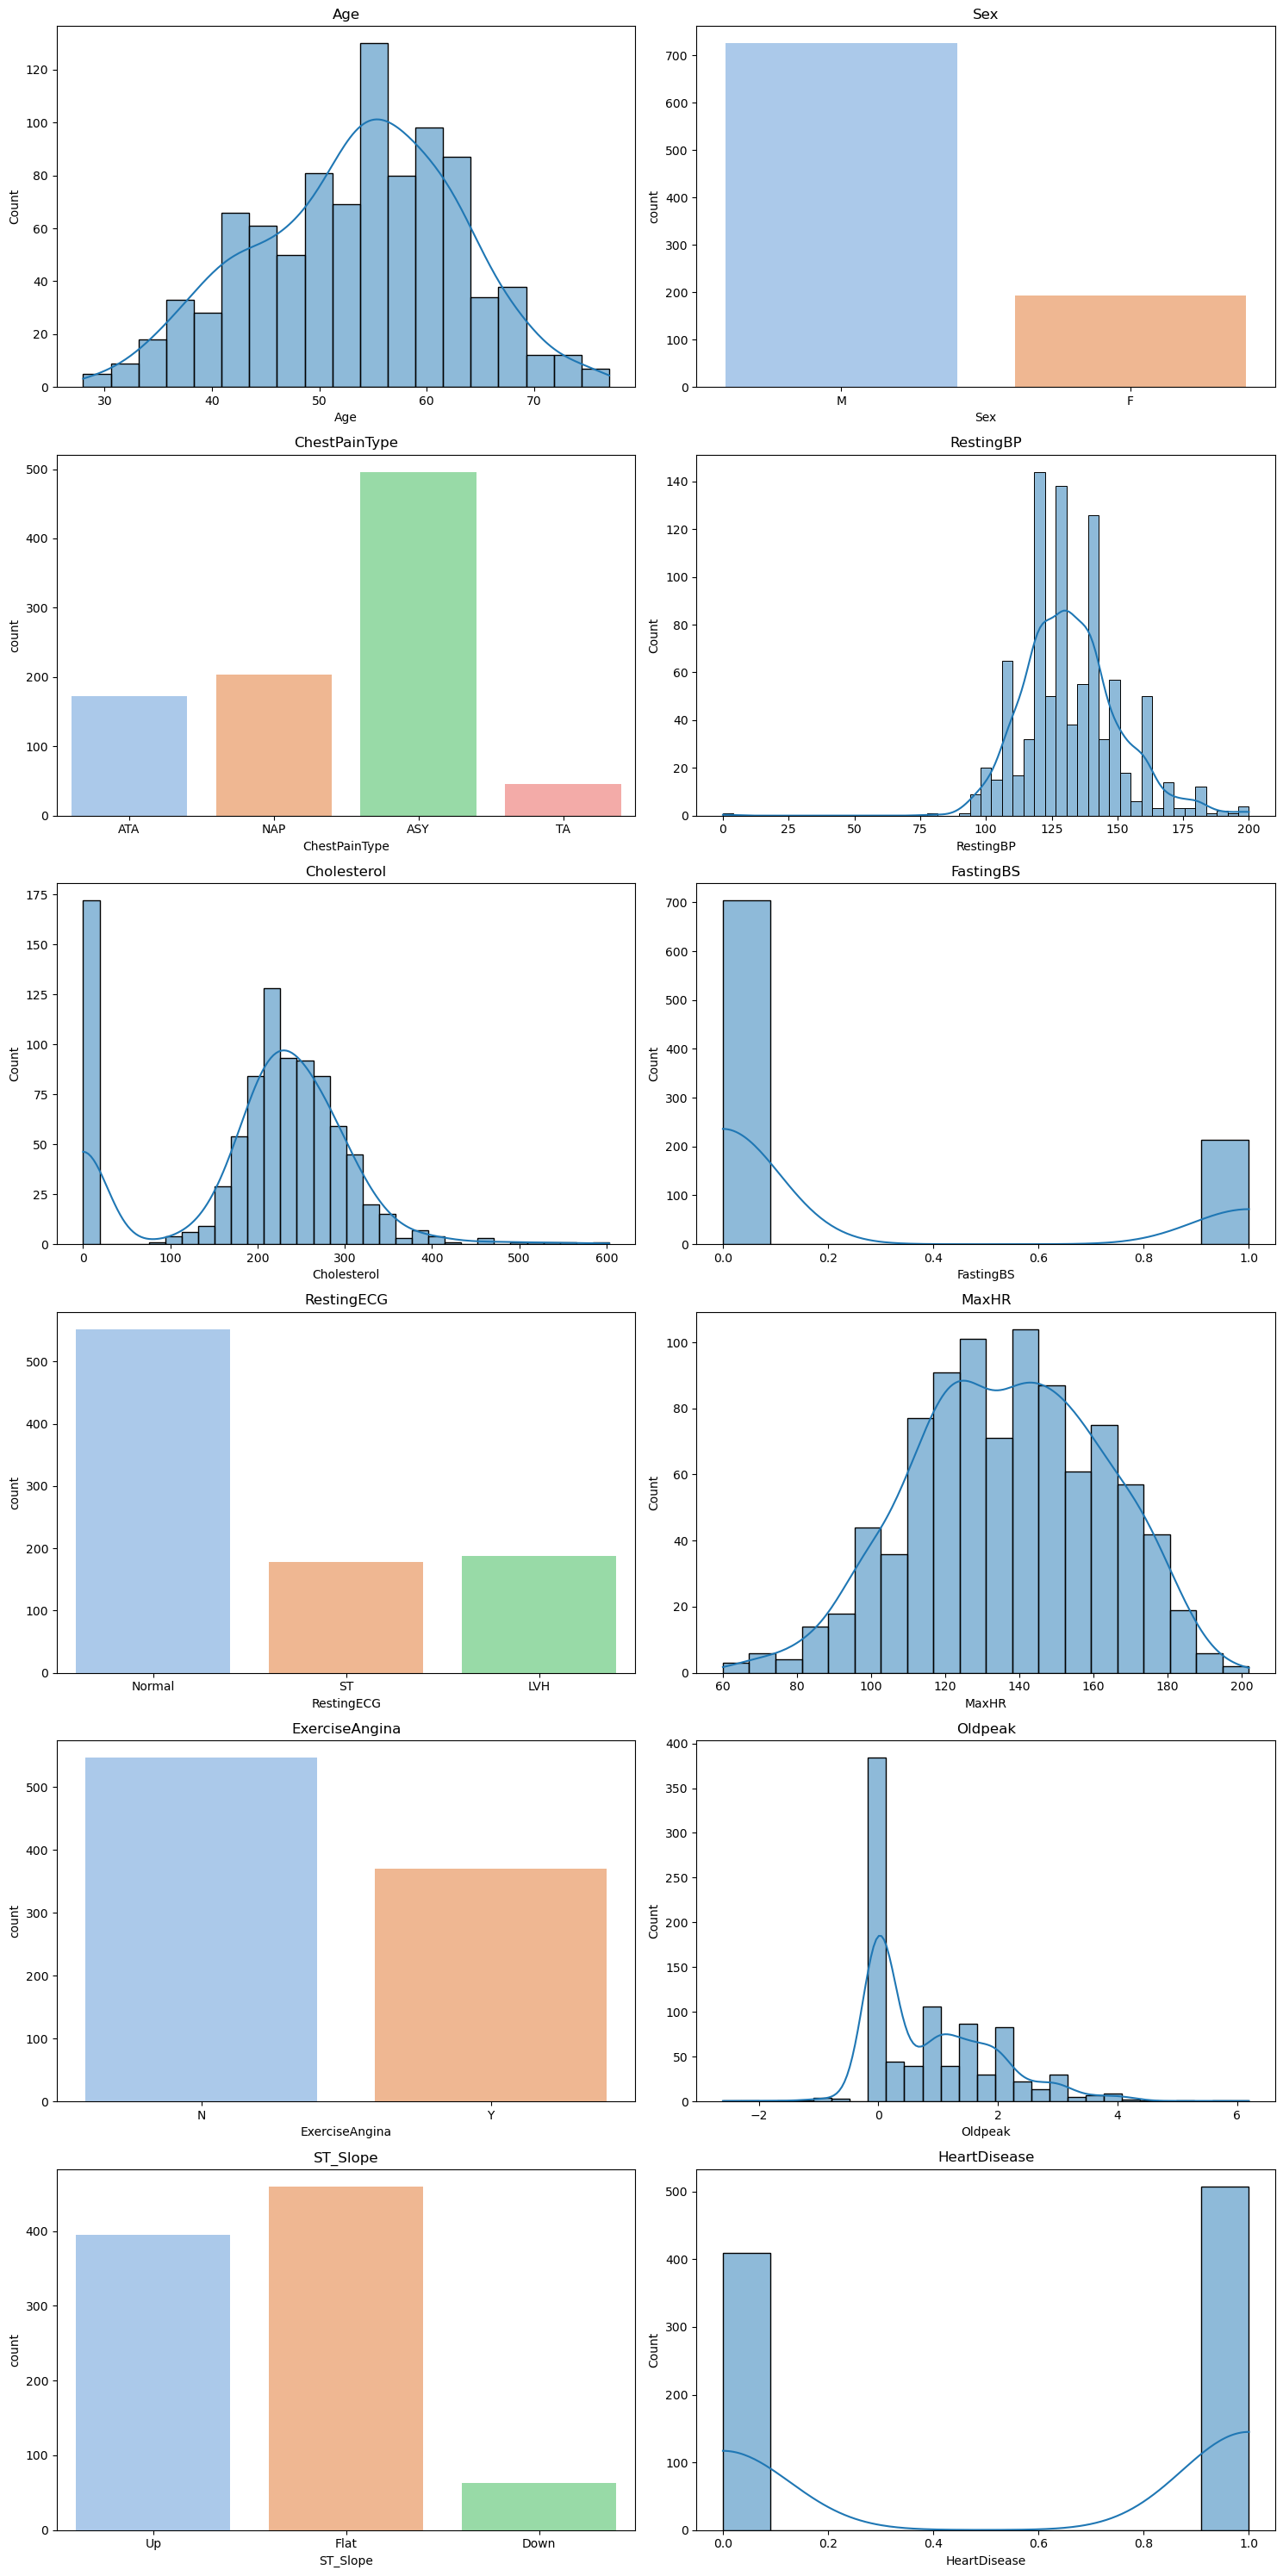

In [11]:
# Get the list of columns with categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot histograms for numeric variables and bar plots for categorical variables
fig, axes = plt.subplots(nrows=len(df.columns)//2 + len(df.columns) % 2, ncols=2, figsize=(15, 5 * len(df.columns)//2 + 5 * len(df.columns) % 2))

for i, column in enumerate(df.columns):
    if column in categorical_columns:
        sns.countplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel')
        axes[i//2, i%2].set_title(column)
    else:
        sns.histplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel', kde=True)
        axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()

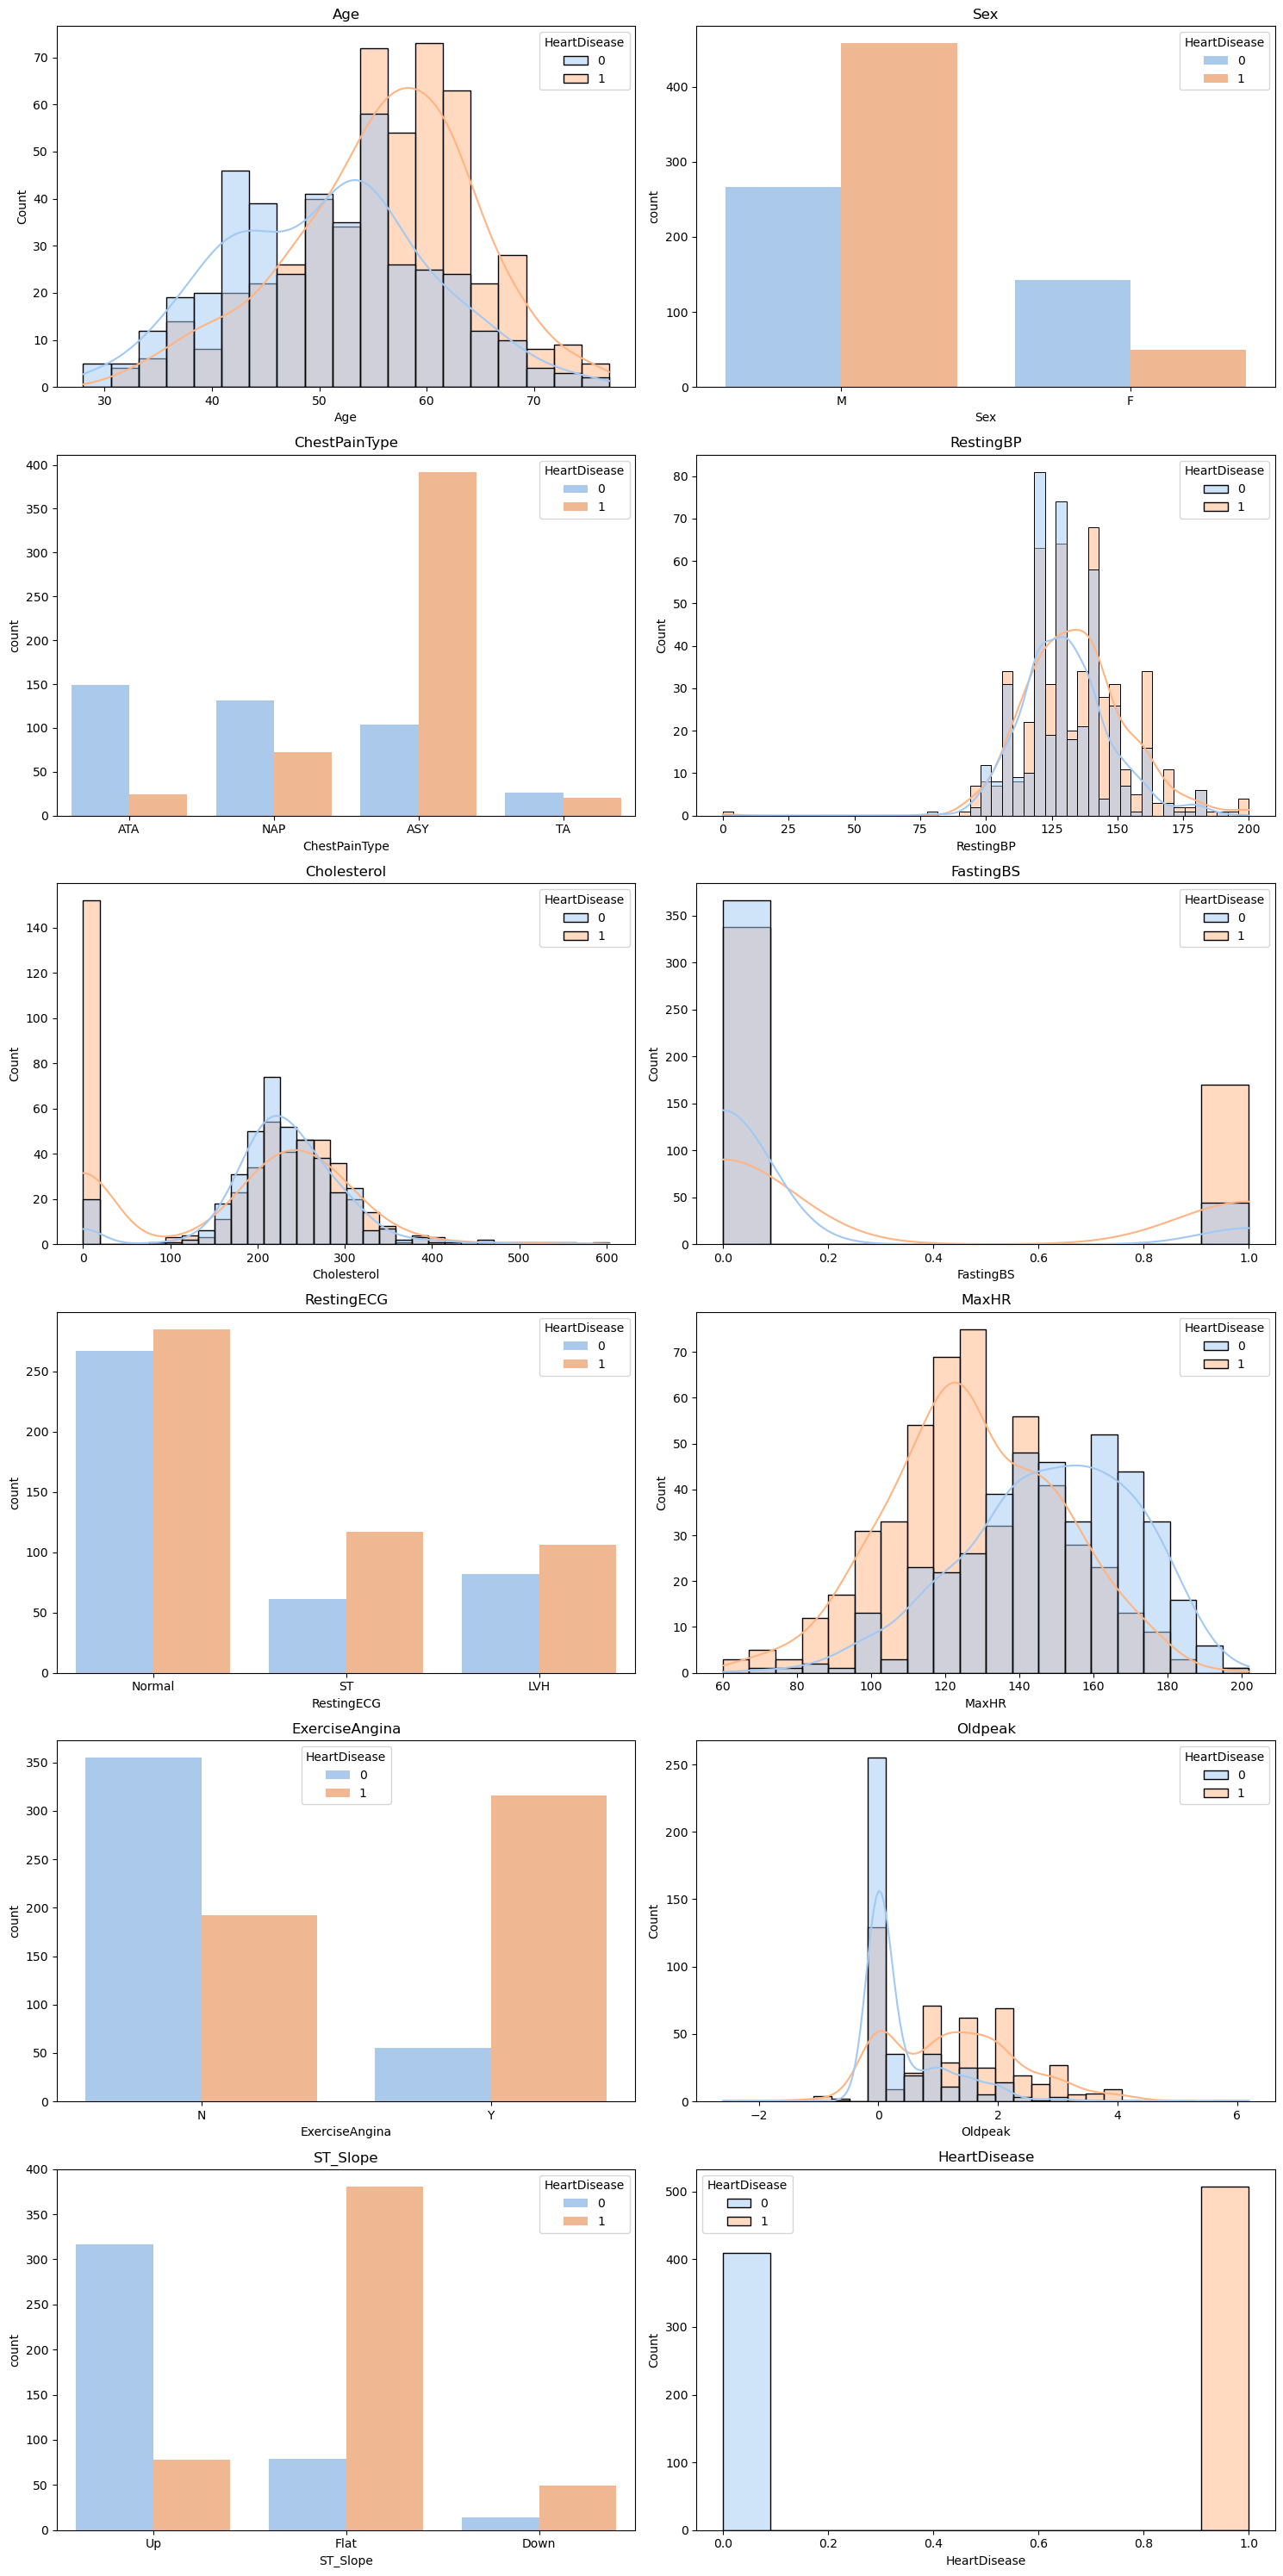

In [12]:
# Get the list of columns with categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot histograms for numeric variables and bar plots for categorical variables with 'HeartDisease' as hue
fig, axes = plt.subplots(nrows=len(df.columns)//2 + len(df.columns) % 2, ncols=2, figsize=(15, 5 * len(df.columns)//2 + 5 * len(df.columns) % 2))

for i, column in enumerate(df.columns):
    if column in categorical_columns:
        sns.countplot(data=df, x=column, hue='HeartDisease', ax=axes[i//2, i%2], palette='pastel')
        axes[i//2, i%2].set_title(column)
    else:
        sns.histplot(data=df, x=column, hue='HeartDisease', ax=axes[i//2, i%2], palette='pastel', kde=True)
        axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()

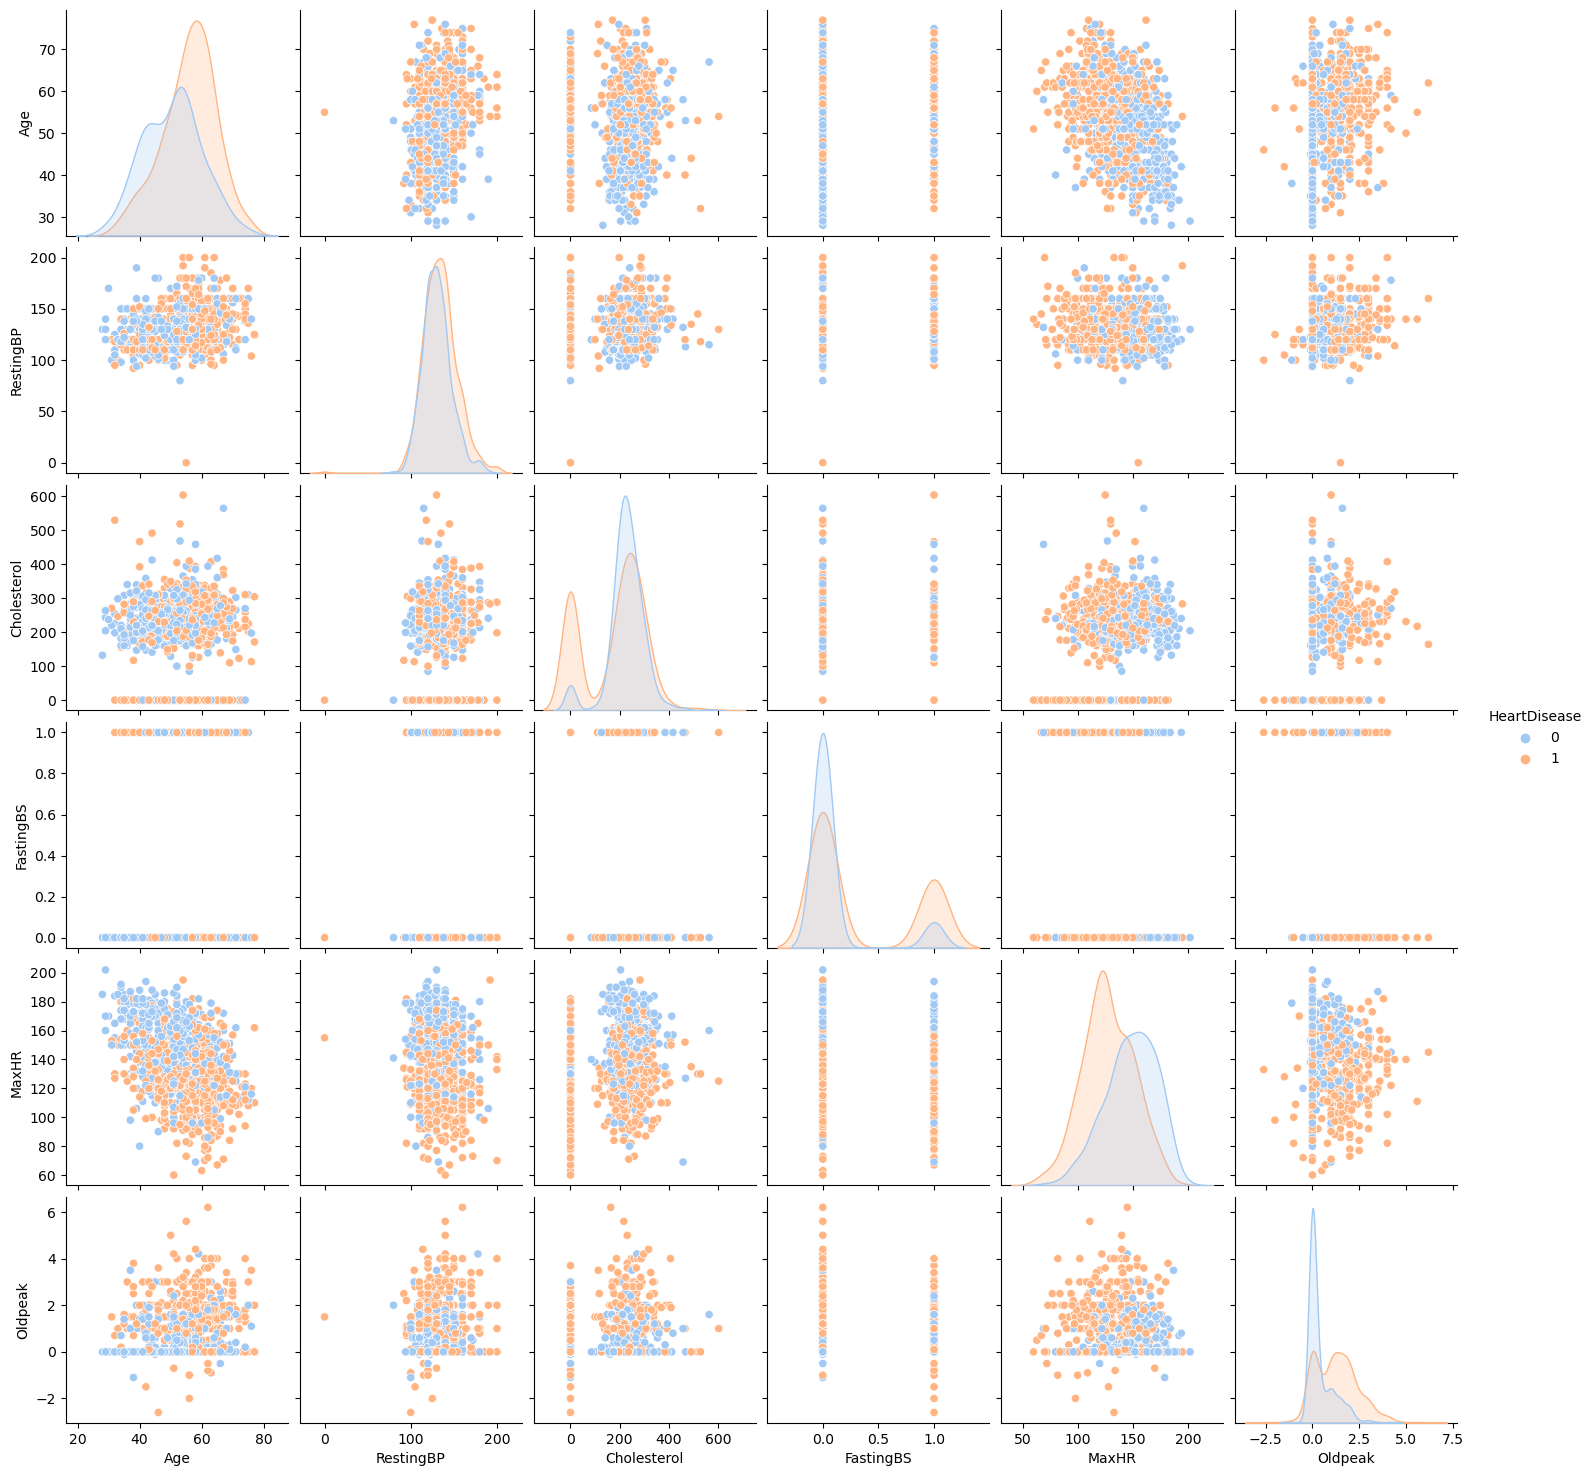

In [13]:
# Create a pairplot with hue as 'HeartDisease'
sns.pairplot(data=df, hue='HeartDisease', palette='pastel')
plt.show()

## Modeling

In [14]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



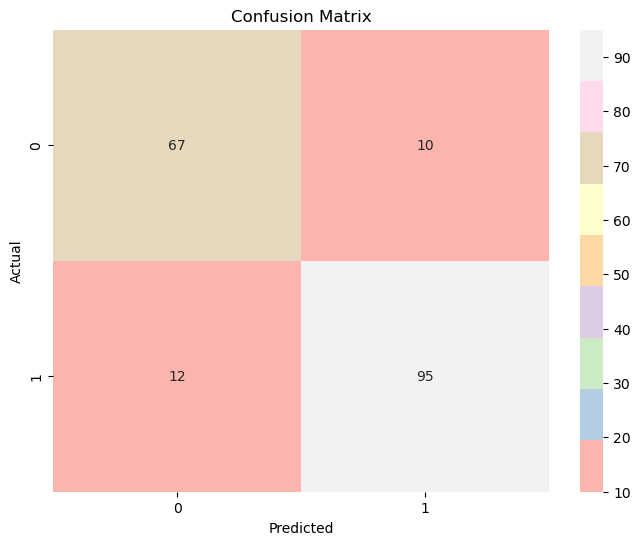

In [15]:
# Step 1: Split the data
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()